In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

In [2]:
wine = fetch_openml(name="wine-quality-red", version=1, as_frame=True)

df = wine.frame
df.sample(15).T

,960,76,16,755,459,1365,19,672,973,63,1055,203,1105,1152,1320
fixed_acidity,8.5,8.8,8.5,7.8,11.6,7.8,7.9,9.8,8.5,7.0,8.2,7.0,6.3,8.3,9.7
volatile_acidity,0.47,0.41,0.28,0.91,0.58,0.5,0.32,1.24,0.34,0.735,0.64,0.42,0.57,0.6,0.66
citric_acid,0.27,0.64,0.56,0.07,0.66,0.09,0.51,0.34,0.44,0.05,0.27,0.35,0.28,0.25,0.34
residual_sugar,1.9,2.2,1.8,1.9,2.2,2.2,1.8,2.0,1.7,2.0,2.0,1.6,2.1,2.2,2.6
chlorides,0.058,0.093,0.092,0.058,0.074,0.115,0.341,0.079,0.079,0.081,0.095,0.088,0.048,0.118,0.094
free_sulfur_dioxide,18.0,9.0,35.0,22.0,10.0,10.0,17.0,32.0,6.0,13.0,5.0,16.0,13.0,9.0,12.0
total_sulfur_dioxide,38.0,42.0,103.0,47.0,47.0,42.0,56.0,151.0,12.0,54.0,77.0,39.0,49.0,38.0,88.0
density,0.99518,0.9986,0.9969,0.99525,1.0008,0.9971,0.9969,0.998,0.99605,0.9966,0.99747,0.9961,0.99374,0.99616,0.99796
pH,3.16,3.54,3.3,3.51,3.25,3.18,3.04,3.15,3.52,3.39,3.13,3.34,3.41,3.15,3.26
sulphates,0.85,0.66,0.75,0.43,0.57,0.62,1.08,0.53,0.63,0.57,0.62,0.55,0.6,0.53,0.66


## Пример датасета с несбалансированными классами
Wine Quality (UCI)

In [3]:
print(df['class'].value_counts().sort_index())


class
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


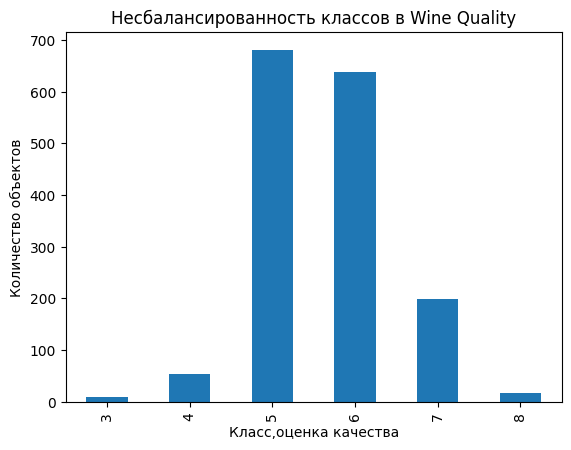

In [4]:
plt.figure()
df['class'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Класс,оценка качества')
plt.ylabel('Количество объектов')
plt.title('Несбалансированность классов в Wine Quality')
plt.show()

## Постройте решение задачи классификации двумя различными по своей природе методами классического машинного обучения.

In [5]:
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y # так как дисбаланс 
)

In [6]:
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=500,
        # multi_class='auto',
        # class_weight=None,  # без балансировки
        class_weight='balanced',
    ))
])

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.31      0.11        13
           5       0.71      0.56      0.63       170
           6       0.52      0.31      0.39       160
           7       0.36      0.48      0.41        50
           8       0.04      0.20      0.06         5

    accuracy                           0.43       400
   macro avg       0.28      0.31      0.27       400
weighted avg       0.56      0.43      0.48       400



In [7]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.69      0.75      0.72       170
           6       0.61      0.69      0.65       160
           7       0.69      0.44      0.54        50
           8       0.50      0.20      0.29         5

    accuracy                           0.65       400
   macro avg       0.42      0.35      0.37       400
weighted avg       0.63      0.65      0.64       400



/home/lex/code/learning/bfu/xai_bfu/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/lex/code/learning/bfu/xai_bfu/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/lex/code/learning/bfu/xai_bfu/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [14]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    n_estimators=700,
    max_depth=20,
    learning_rate=0.02,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_pred_original = le.inverse_transform(y_pred_xgb)
y_test_original = le.inverse_transform(y_test)
print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("F1 macro:", f1_score(y_test_original, y_pred_original, average='macro'))
print("F1 weighted:", f1_score(y_test_original, y_pred_original, average='weighted'))
print(classification_report(y_test_original, y_pred_original))

Accuracy: 0.6625
F1 macro: 0.41010402921614886
F1 weighted: 0.6510145722539886
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.09      0.17        11
           5       0.71      0.76      0.73       136
           6       0.62      0.67      0.64       128
           7       0.66      0.53      0.58        40
           8       0.33      0.33      0.33         3

    accuracy                           0.66       320
   macro avg       0.55      0.40      0.41       320
weighted avg       0.67      0.66      0.65       320



/home/lex/code/learning/bfu/xai_bfu/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/lex/code/learning/bfu/xai_bfu/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/lex/code/learning/bfu/xai_bfu/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 